# DSC4001-01 Exercise 13

**This exercise notebook will go through Unsupervised Learning using Python's Scikit-Learn Library**




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

## Import Scikit-Learn

In [2]:
import sklearn
from sklearn import datasets

from sklearn.cluster import KMeans, SpectralClustering


## K-Means Clustering

Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points. Many clustering algorithms are available in Scikit-Learn.

The K-means algorithm searches for a *pre-determined* number of clusters within an unlabled multi-dimensional dataset. 

* The 'cluster center' or 'representative' is the **arithmetic mean** of all the points belonging to the cluster

* Each point is closer to its own cluster center than to other cluster centers


## Get the dataset

* [``datasets.make_blobs``](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs): generate Gaussian blobs for clustering


### Load the data

In [3]:
X, y = datasets.make_blobs(n_samples=300, centers=4, 
  cluster_std=0.6, random_state=0)

In [4]:
print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [5]:
print(X[:5])
print(y[:5])

[[ 0.83685684  2.13635938]
 [-1.4136581   7.40962324]
 [ 1.15521298  5.09961887]
 [-1.01861632  7.81491465]
 [ 1.27135141  1.89254207]]
[1 3 0 3 1]


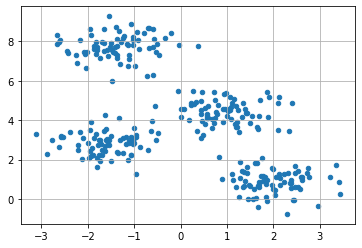

In [6]:
plt.scatter(X[:,0], X[:,1], s=20)
plt.grid()
plt.show()

## Train and Predict

* Select a type of clustering model/algorithm 
  * In sklearn: 
    * [K-Means clustering](https://scikit-learn.org/stable/modules/clustering.html#k-means)
    * [Spectral clustering](https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering)
    * [Gaussian mixture models](https://scikit-learn.org/stable/modules/mixture.html#mixture) 
    * ... 

* Instantiate the clustering model and choose model hyperparameters
  * For K-means, the number of clusters is a hyperparameter

* Train the model on training data
  * **``.fit(X)``**: Fit the kmeans model according to the given training data

* Apply the model to data 
  * **``.predict(X)``**: Predict clusters for data ``X``



### sklearn.cluster.KMeans

We will focus on **K-Means Clustering**.
* ``sklearn.cluster.KMeans``: K-Means clustering. 
  * ``n_clusters``: the number of clusters to form 
  * ``init``: 'k-means++' or 'random': method for initialization
  * ``n_init``: number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output in terms opf inertia
  * ``max_iter``: maximum number of iterations of the k-means algorithm for a single run 
  


In [7]:
# Instantiate the clustering model 

kmeans = KMeans(n_clusters=4)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
# Fitting the model on data

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
# Predict cluster labels

y_kmeans = kmeans.predict(X)

Attributes:

* ``cluster_centers_``: coordinates of learned cluster centers
* ``labels_``: labels of each point
* ``inertia_``: sum of squared distances of samples to their closest center


In [10]:
kmeans.cluster_centers_

array([[-1.58438467,  2.83081263],
       [ 0.94973532,  4.41906906],
       [-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314]])

In [11]:
kmeans.labels_[:5]

array([3, 2, 1, 2, 3], dtype=int32)

In [13]:
y_kmeans[:5]

array([3, 2, 1, 2, 3], dtype=int32)

In [12]:
kmeans.inertia_

212.00599621083478

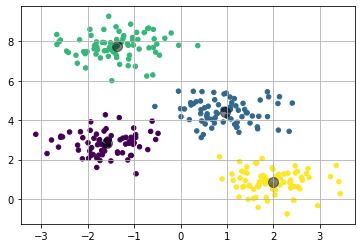

In [14]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)

plt.grid()
plt.show()

### Understanding K-Means algorithm as Expectation-Maximization

K-Means clustering method consists of the following procedure:

* Randomly assign cluster centers

* Repeat until converged:
  * **Expectation-step**: assign points to the nearest cluster center

  * **Maximization-step**: set the cluster centers to the mean of each cluster

Let's visualize the procedure of K-Means clustering algorithm:

In [15]:
kmeans_iter1 = KMeans(n_clusters=4, init='random', n_init=1,
  algorithm='full', max_iter=1, random_state=20)
kmeans_iter2 = KMeans(n_clusters=4, init='random', n_init=1,
  algorithm='full', max_iter=2, random_state=20)
kmeans_iter3 = KMeans(n_clusters=4, init='random', n_init=1,
  algorithm='full', max_iter=3, random_state=20)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=4,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=20,
       tol=0.0001, verbose=0)

In [16]:
y_kmeans_iter1 = kmeans_iter1.predict(X)
y_kmeans_iter2 = kmeans_iter2.predict(X)
y_kmeans_iter3 = kmeans_iter3.predict(X)

In [17]:
print('Iter 1 inertia %f' %(kmeans_iter1.inertia_))
print('Iter 2 inertia %f' %(kmeans_iter2.inertia_))
print('Iter 3 inertia %f' %(kmeans_iter3.inertia_))

Iter 1 inertia 294.810659
Iter 2 inertia 212.553843
Iter 3 inertia 212.005996


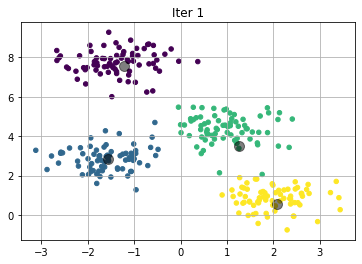

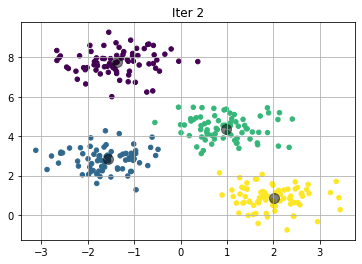

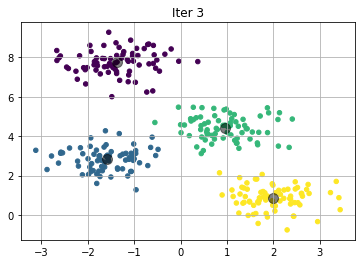

In [19]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans_iter1, s=20, cmap='viridis')

centers_iter1 = kmeans_iter1.cluster_centers_
plt.scatter(centers_iter1[:,0], centers_iter1[:,1], c='black', s=100, alpha=0.5)
plt.title('Iter 1')
plt.grid()
plt.show()

plt.scatter(X[:,0], X[:,1], c=y_kmeans_iter2, s=20, cmap='viridis')

centers_iter2 = kmeans_iter2.cluster_centers_
plt.scatter(centers_iter2[:,0], centers_iter2[:,1], c='black', s=100, alpha=0.5)
plt.title('Iter 2')
plt.grid()
plt.show()

plt.scatter(X[:,0], X[:,1], c=y_kmeans_iter3, s=20, cmap='viridis')

centers_iter3 = kmeans_iter3.cluster_centers_
plt.scatter(centers_iter3[:,0], centers_iter3[:,1], c='black', s=100, alpha=0.5)
plt.title('Iter 3')
plt.grid()
plt.show()

The following is a very basic implementation of K-Means algorithm from scratch.

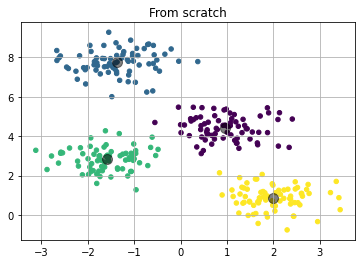

In [22]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=20):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=20, cmap='viridis');

plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)

plt.title('From scratch')
plt.grid()
plt.show()

### Issues of K-Means clustering method

* The globally optimal result may not be achieved
  * Impact of random initializations

* The number of clusters must be selected beforehand

* K-means is limited to linear cluster boundaries
  * Alternatively, we can use ``sklearn.cluster.SpectralClusterin`` for non-linear cluster boundaries


Try with different random initializations: The K-Means clustering algorithm has not converged to a globaly optimal result. 

Thus, it is common for the KMeans to be run for **multiple initializations**, as indeed Scikit-Learn does this by setting `n_init` parameter value.

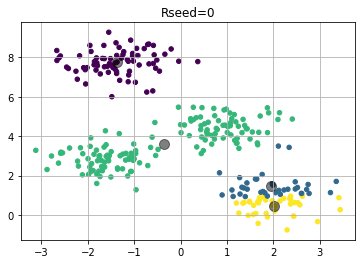

In [47]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=20, cmap='viridis');

plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)

plt.title('Rseed=0')
plt.grid()
plt.show()

Try with different number of clusters

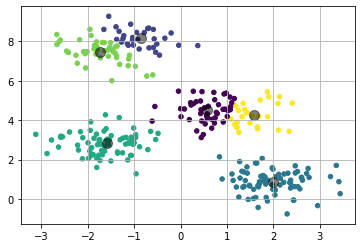

In [48]:
# Instantiate the model
kmeans_n6 = KMeans(n_clusters=6)

# Fit and Predict
y_kmeans_n6 = kmeans_n6.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_kmeans_n6, s=20, cmap='viridis')

centers_n6 = kmeans_n6.cluster_centers_
plt.scatter(centers_n6[:,0], centers_n6[:,1], c='black', s=100, alpha=0.5)

plt.grid()
plt.show()

It is difficult to answer what is the best value of `n_clusters`: For further details, you can check [*silhouette analysis*](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

The boundaries between k-means clusters are linear, which means that it will fail for more complicated dataset. 

In [49]:
X_moons, y_moons = datasets.make_moons(200, noise=0.05, random_state=0)

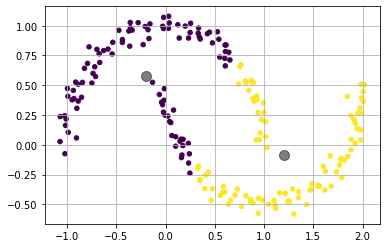

In [50]:
kmeans = KMeans(2, random_state=0)

kmeans.fit(X_moons)
y_kmeans_moons = kmeans.predict(X_moons)

plt.scatter(X_moons[:,0], X_moons[:,1], c=y_kmeans_moons, s=20, cmap='viridis')
centers_moons = kmeans.cluster_centers_
plt.scatter(centers_moons[:,0], centers_moons[:,1], c='black', s=100, alpha=0.5)

plt.grid()
plt.show()

We can use an idea of kernel transformation to project the original data into a higher dimension, where a linear separation is possible. It is implemented in Scikit-Learn with the ``sklearn.cluster.Spectral Clustering``.

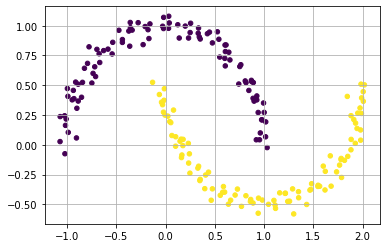

In [ ]:
s_kmeans = SpectralClustering(2, gamma=100, random_state=0)

y_kmeans_moons_s = s_kmeans.fit_predict(X_moons)

plt.scatter(X_moons[:,0], X_moons[:,1], c=y_kmeans_moons_s, s=20, cmap='viridis')

plt.grid()
plt.show()

## Dimensionality Reduction: Principal Component Analysis (PCA)

One of the most broadly used of unsupervised algorithms is principal component analysis (PCA). PCA can be useful as a tool for dimensionality reduction, for visualization, or for feature extraction, ... 

``sklearn.decomposition.PCA`` identifies the 'principal axes'. 
  * `n_components`: number of components to keep. 
  * `svd_solver`: 'auto', 'full', 'randomized, '... : the solver to estimate the principal components
* If 0 < `n_components` < 1 and `svd_solver` = 'full', it automatically selects the number of components such that the amount of explained variance is greater than `n_components`

* `.fit()`: estimate principal components
* `.transform()`: project the data into the `n_components`-dimensional space
* `.inverse_transform()`: reconstruct the data from the projected plane


* `.explained_variance_ratio_`: percentage of variance explained by each of the selected components

In [51]:
from sklearn.decomposition import PCA

In [52]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)

In [53]:
print(X_digits.shape)
print(y_digits.shape)

(1797, 64)
(1797,)


In [57]:
# Instantiate the model 

pca = PCA(n_components=2, random_state=42)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [58]:
X_pca = pca.fit_transform(X_digits)

print(X_digits.shape)
print(X_pca.shape)

(1797, 64)
(1797, 2)


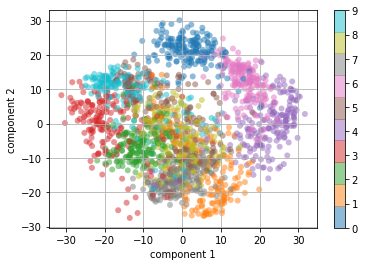

In [59]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_digits,
            edgecolor='none', alpha=0.5, cmap='tab10')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.grid()
plt.show()

In [60]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [61]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_digits)

In [62]:
pca.n_components_

29

In [69]:
def plot_digits(data):
    fig, axes = plt.subplots(1, 10, figsize=(10, 1),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))


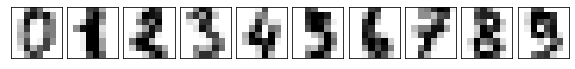

In [70]:
plot_digits(X_digits)

In [71]:
X_rec = pca.inverse_transform(X_pca)

In [72]:
print(X_pca.shape)
print(X_rec.shape)

(1797, 29)
(1797, 64)


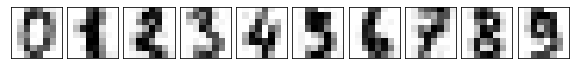

In [73]:
plot_digits(X_rec)

## Another Example: K-Means on digits

* Use the digits dataset `X_digits` loaded above.


In [74]:
print(X_digits.shape)

(1797, 64)


In [75]:
kmeans = KMeans(n_clusters=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_digits)

In [76]:
centers = kmeans.cluster_centers_
print(centers.shape)

(10, 64)


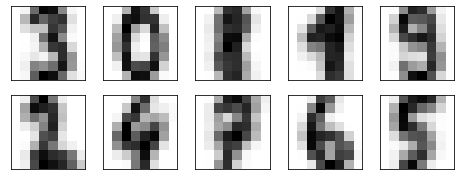

In [82]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = centers.reshape(10, 8, 8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)



We can match each learned cluster label index with the true labels

In [85]:
from scipy.stats import mode

labels = np.zeros_like(y_kmeans)
for i in range(10):
    mask = (y_kmeans == i)
    labels[mask] = mode(y_digits[mask])[0]

In [88]:
labels

array([0, 8, 8, ..., 8, 9, 9], dtype=int32)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_digits, labels)

0.7924318308291597

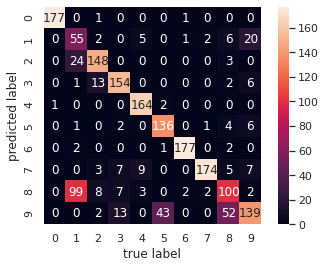

In [95]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_digits, labels)


sns.heatmap(mat.T, square=True, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');